In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot as up

In [2]:
tower2p1_events=pd.read_csv("pulse_out/Tower2p1_event_info.csv") #contains reconstruction information
pulses_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['samples'] #pulses
event_nums_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['event_number'] #event numbers to connect pulses to reconstruction info

ADC2mV=8.0108642578125e-02 ##this number should be checked with up-to-date front end board readings, but is fine for now

In [3]:
tower2p1_events

,Channel,Time,CoincTime,NumPulses,OFdelay,OFChi2,Energy,Baseline,MaxToBaseline,Run,PCANorm,event_number,BaselineSlope,SingleTrigger
0,54,1018.808,1015.720415,1,3.119665,3.511851,2617.897933,-5949.946025,1135.256388,352044,4.796232,81146,-0.004776,False
1,53,1029.120,1026.040443,1,3.119646,959.445237,1291.883245,-3041.182805,616.774846,352044,16.963644,81911,-0.000647,True
2,58,1056.312,1053.235369,1,3.086841,10.635230,2600.413432,-3019.474859,1154.465551,352044,14.263034,84090,-0.004409,True
3,55,1060.072,1057.011309,1,3.070154,0.177860,737.921289,-3309.880651,198.861516,352044,10.408411,84367,-0.002333,True
4,56,1067.584,1064.502041,1,3.122515,1.473148,1424.047190,-2917.889409,584.885412,352044,1.821491,85011,-0.000906,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24858,59,128172.264,128169.191868,1,3.090579,8.643130,2336.963051,-4723.471242,1099.356252,352044,11.374310,10152655,-0.002778,True
24859,64,128188.112,128185.029504,1,3.123739,0.686072,825.788777,-6597.101735,357.279348,352044,-0.920750,10153787,-0.002088,True
24860,62,128193.784,128190.698521,1,3.115107,1.280897,1114.787370,-3414.805634,669.562561,352044,-0.708036,10154324,-0.001870,True
24861,61,128194.640,128191.566482,1,3.092249,2.601401,662.462041,-4403.333359,308.580093,352044,-0.435548,10154390,-0.000717,True


In [4]:
tower2p1_events["Channel"].unique()

array([54, 53, 58, 55, 56, 62, 61, 65, 64, 57, 60, 59, 63])

In [5]:
CHANNEL=60 #hard-coding this for now...

In [6]:
file=open("average_pulse_dump/Channel00"+str(CHANNEL)+"_AveragePulse.txt")
for line in file:
    parse=line.replace("fData  ","")
    parse=parse.replace("\n","")
    splits=parse.split(" ")
    avg_pulse=np.array(splits,dtype=float)
    break

cleaned_avg_pulse=(avg_pulse-np.mean(avg_pulse[0:50]))/np.max(avg_pulse-np.mean(avg_pulse[0:50]))

Text(0, 0.5, 'Pulse Amplitude: Correlates to E')

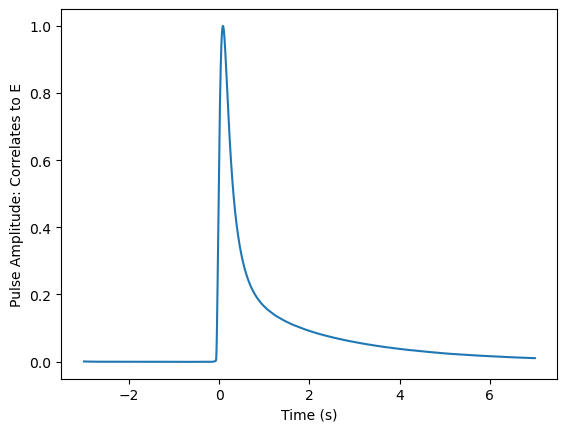

In [7]:
#check out what normalized average pulse for channel 60 is

fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

plt.xlabel("Time (s)")
plt.ylabel("Pulse Amplitude: Correlates to E")

In [8]:
THIS_PULSE=8272 #pulse we'll focus on, to get nODE working

In [9]:
#check info on it...

#how to pass back & forth between event number & pulse id...
tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]]

,Channel,Time,CoincTime,NumPulses,OFdelay,OFChi2,Energy,Baseline,MaxToBaseline,Run,PCANorm,event_number,BaselineSlope,SingleTrigger
8272,60,43488.616,43485.538606,1,3.079257,4.561317,1123.404947,-4594.086314,390.785838,352044,0.430006,3448536,0.001447,True


In [10]:
THIS_ENERGY=tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]].iloc[0]['Energy']

1123.4049474985482  keV


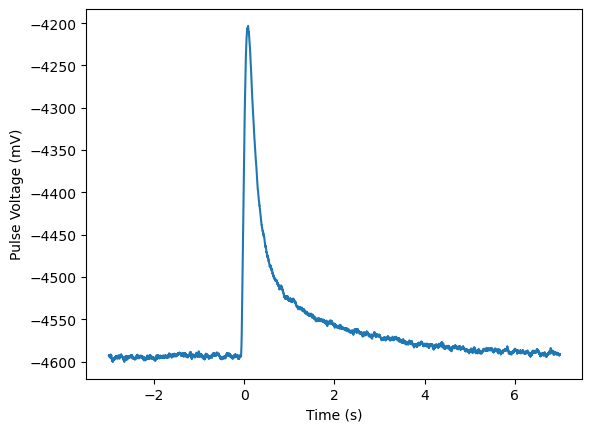

In [11]:
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

In [12]:
pulses_tower2p1

array([[-74182, -74180, -74182, ..., -74286, -74289, -74289],
       [-37945, -37953, -37955, ..., -37966, -37958, -37950],
       [-37614, -37620, -37625, ..., -37743, -37740, -37736],
       ...,
       [-42675, -42675, -42678, ..., -42637, -42637, -42637],
       [-54926, -54922, -54917, ..., -54976, -54986, -54995],
       [-39121, -39119, -39126, ..., -39519, -39522, -39521]], dtype=int32)

1123.4049474985482  keV


(-0.1, 0.1)

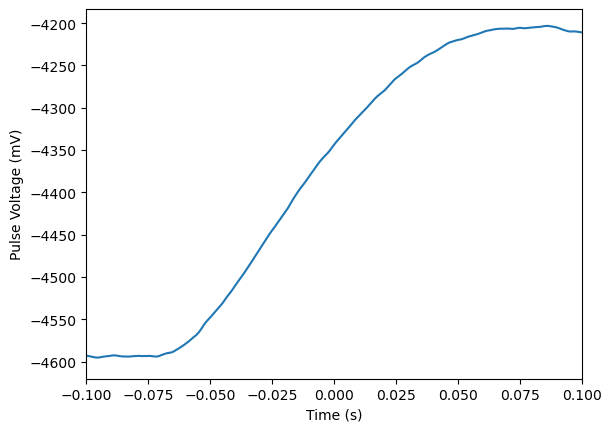

In [13]:
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

plt.xlim([-0.1,0.1])

In [14]:
### feel free to normalize the pulse, e.g. correct for the baseline offset, and make overall amplitude ~0.5

###can start by setting initial condition at time 0, but we should think about how to fine-tune for small time offsets:
### could be grid-search, add differentiable parameter
# this will also be easier when we move beyond 1 pulse to fitting many pulses simulatenously

#initial conditions: should be (0, Energy, 0)
#                               ^    ^     ^
#                               |    |     |
#                               |    |     \- this variable is an extra with no clear interpretation, but can assist in modelling
#                               |    \- this variable models the energy: has initial condition from calibration
#                               \- this variable models the observed pulse, and is the only one entering into the loss
#start off with just our usual MSE-loss between predicted and observed

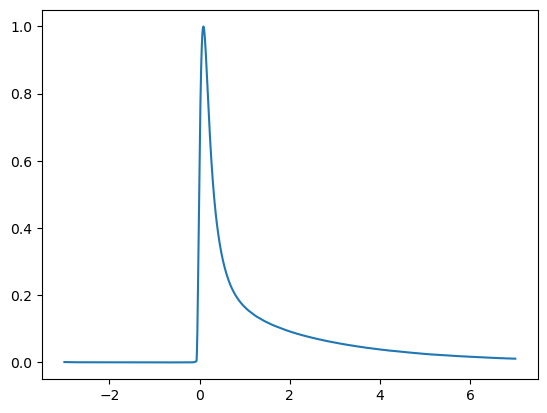

In [15]:
fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

In [16]:
ch60_pulses=pulses_tower2p1[tower2p1_events['Channel']==60]
ch60_events=tower2p1_events[tower2p1_events['Channel']==60]

In [17]:
ch60_pulses

array([[-56155, -56158, -56162, ..., -56091, -56096, -56096],
       [-56197, -56200, -56200, ..., -56118, -56116, -56113],
       [-56126, -56119, -56107, ..., -56180, -56182, -56189],
       ...,
       [-57643, -57648, -57653, ..., -57580, -57581, -57590],
       [-57596, -57592, -57587, ..., -57574, -57576, -57579],
       [-57344, -57353, -57361, ..., -57339, -57343, -57343]], dtype=int32)

In [18]:
ch60_events

,Channel,Time,CoincTime,NumPulses,OFdelay,OFChi2,Energy,Baseline,MaxToBaseline,Run,PCANorm,event_number,BaselineSlope,SingleTrigger
19,60,1139.608,1136.529986,1,3.078637,2.984120,1043.190614,-4498.994934,360.822784,352044,1.191920,90694,0.000248,True
32,60,1192.016,1188.940325,1,3.080976,1.683988,876.107679,-4501.017446,305.327291,352044,-0.954280,94879,0.000375,True
35,60,1199.696,1196.621604,1,3.082255,0.893486,509.070367,-4495.206223,172.784195,352044,7.949973,95525,-0.002434,True
41,60,1262.528,1259.456059,1,3.084710,4.056065,1476.215868,-4488.077835,498.827652,352044,19.140515,100475,-0.006717,True
74,60,1464.832,1461.759936,1,3.084587,0.485655,574.841460,-4511.481130,198.672139,352044,2.637790,116781,0.000295,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24736,60,127496.640,127493.569137,1,3.085788,2.086113,531.887770,-4606.593124,184.275620,352044,2.425850,10099062,-0.002197,True
24764,60,127729.816,127726.740540,1,3.081191,0.699453,1264.004925,-4609.441289,435.861120,352044,1.324280,10117688,-0.000242,True
24787,60,127838.856,127835.782470,1,3.083121,0.468668,1420.374895,-4616.791809,489.113892,352044,-0.793452,10126095,0.000601,True
24804,60,127882.664,127879.586522,1,3.079173,1.241305,1531.281396,-4615.984848,527.880600,352044,0.130943,10129530,-0.001296,True


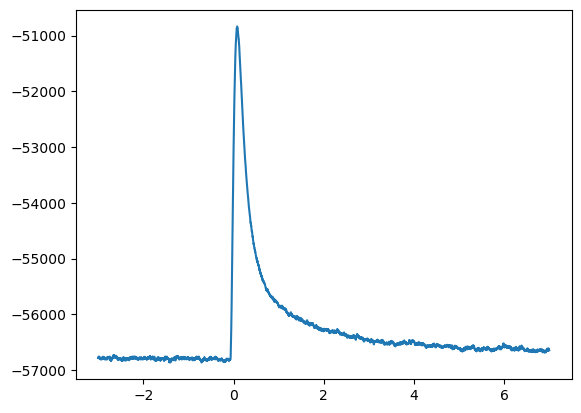

In [19]:
pick_pulse=32 # which pulse you want on the channel, between 0 & len(ch60_pulses)-1. I'm randomly choosing 32 here
this_pulse=ch60_pulses[pick_pulse] #voltage values for the pulse timestream
pulse_info=ch60_events.iloc[pick_pulse] #info for that pulse. need to access through iloc to correspond to same order as the pulse timestream\
plt.plot(np.linspace(-3,7,10000),this_pulse)

In [20]:
df = pd.DataFrame({"Times": np.linspace(-3,7,10000), "Energy": ADC2mV/4200*pulses_tower2p1[THIS_PULSE]})
df


,Times,Energy
0,-3.000,-1.093597
1,-2.999,-1.093674
2,-2.998,-1.093731
3,-2.997,-1.093655
4,-2.996,-1.093559
...,...,...
9995,6.996,-1.093273
9996,6.997,-1.093273
9997,6.998,-1.093311
9998,6.999,-1.093235


In [21]:
df.to_csv('file1.csv')

In [22]:
import numpy as np 
import pandas as pd 

import optax
import matplotlib.pyplot as plt
from typing import List
import equinox as eqx
import jax
import jax.numpy as jnp
import time

import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax

In [23]:
energies = jnp.array(df["Energy"])
time = jnp.array(df["Times"])
energies += energies[0]*-1

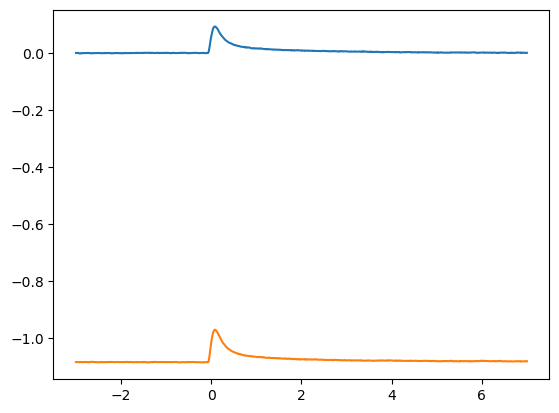

In [24]:
plt.plot(time, energies)
plt.plot(np.linspace(-3,7,10000),this_pulse*ADC2mV/4200)


In [25]:
time = time[2900:]
energies = energies[2900:]

In [26]:
energies = energies/max(energies)

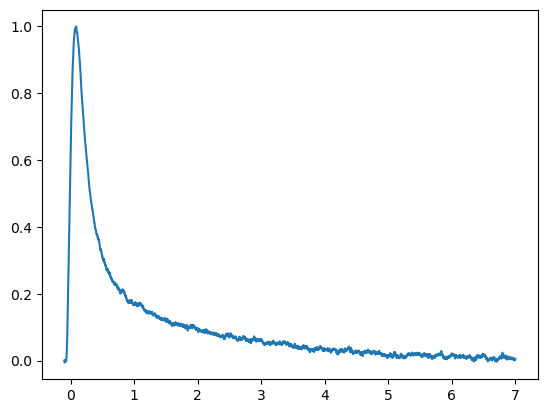

In [27]:
plt.plot(time, energies)

In [28]:
length = len(energies)
z_s = np.linspace(0, 4, length)
length

7100

In [29]:
time

Array([-0.09970997, -0.09870987, -0.09770977, ...,  6.9979997 ,
        6.999     ,  7.        ], dtype=float32)

In [30]:
class LinearFunction(eqx.Module):
    layers: list

    def __init__(self, key): 
        key1, key2, key3, key4, key5, key6, key7 = jax.random.split(key, 7)
        self.layers = [eqx.nn.Linear(3,6, key = key1, use_bias=True), 
                       eqx.nn.Linear(6,3, key = key1, use_bias=True)] 
    def __call__(self, t, y, *args):
    
        for layer in self.layers[:-1]:
            y = jax.nn.tanh(layer(y))
        y = self.layers[-1](y)

        return y

In [31]:
vars = [energies[0], 10, 0]

In [32]:
energies

Array([ 0.        , -0.00143855, -0.00308261, ...,  0.00308261,
        0.00390464,  0.00513769], dtype=float32)

In [36]:
def model_to_loss(model, y_s, z_s, t_s):
    # Solve the differential equation
    
    #print("MODELTOLOSS", y_s[0], z_s[0], t_s[len[t_s]])
    solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(model),
        diffrax.Tsit5(),
        t0=float(t_s[0]),
        t1=float(t_s[-1]),
        dt0=0.001,
        y0=jnp.array(vars, dtype=jnp.float64),  
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(t_s)),
    )
    
    y = solutions.ys[:length-1, 0]
    a =  solutions.ys[:length-1, 1]
    b =  solutions.ys[:length-1, 2]
     
   # print(y)

    
    # Use nan_to_num to handle NaNs
    y = jnp.nan_to_num(y, nan=0.0)
   
   
    # Calculate squared differences for the loss
    y_diff = ((y - y_s[:length-1]) ** 2)
    #z_diff = (z - z_s[:N_SAMPLES-1]) ** 2
   # print(jnp.mean(y_diff) + jnp.mean(z_diff))
   # return jnp.sqrt(jnp.mean(y_diff))

   # Predicted outputs
    y = solutions.ys[:length - 1, 0]
    all_outputs = solutions.ys

   
    y_diff = (y - y_s[:length - 1]) ** 2
    squared_loss = jnp.mean(y_diff)

   
    zero_input = jnp.zeros_like(all_outputs[0])
    zero_output = model(0, zero_input)  
    equilibrium_loss = jnp.mean(jnp.abs(zero_output) ** 2)

   
    final_output = all_outputs[-1]
    end_loss = jnp.mean(jnp.abs(final_output))

    reg_lambda = 1e-4

    #l2_loss = reg_lambda * sum(jnp.sum(jnp.square(p)) for p in jax.tree_util.tree_leaves(model) if p.ndim > 0)
    total_loss = (squared_loss + equilibrium_loss)
    return total_loss

In [37]:
time

Array([-0.09970997, -0.09870987, -0.09770977, ...,  6.9979997 ,
        6.999     ,  7.        ], dtype=float32)

In [38]:
model_to_loss_and_grad = eqx.filter_value_and_grad(model_to_loss)
opt = optax.rmsprop(learning_rate=0.003)
key = jax.random.PRNGKey(41)
key, subkey = jax.random.split(key, 2)
"""def custom_schedule(step):
    # Decrease learning rate as the step increases
    return jnp.maximum(0.001, 0.009 * (0.90 ** (step / 10000000)))  # Cap at 0.001

opt = optax.chain(
    optax.scale_by_adam(),
    optax.scale_by_schedule(custom_schedule)
)"""


def make_step(m, opt_s, y_s, z_s, t_s):
    loss, grad = model_to_loss_and_grad(eqx.filter(m, eqx.is_inexact_array), y_s, z_s, t_s)
    updates, opt_s = opt.update(grad, opt_s, m)
    m = eqx.apply_updates(m, updates)
    return m, opt_s, loss

loss_history = []
MODEL = LinearFunction(subkey)
best_loss = float('inf')
opt_state = opt.init(eqx.filter(MODEL, eqx.is_array))
for epoch in range(60000):
    MODEL, opt_state, loss = make_step(MODEL, opt_state, energies, z_s, time)
    loss_history.append(loss)

    
    if loss < best_loss:
        best_loss = loss
        best_weights = eqx.tree_serialise_leaves("best_model.eqx", MODEL)
    
    if epoch % 100 == 0:  # Log every 100 epochs
        print(f"Epoch {epoch}, Loss {loss}")


/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_59915/3197720569.py:11: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  y0=jnp.array(vars, dtype=jnp.float64),


Epoch 0, Loss 3.0820417404174805
Epoch 100, Loss 0.04543349891901016
Epoch 200, Loss 0.040448546409606934
Epoch 300, Loss 0.03947741910815239
Epoch 400, Loss 0.03846605867147446
Epoch 500, Loss 0.03634804114699364
Epoch 600, Loss 0.033903371542692184
Epoch 700, Loss 0.03184464946389198
Epoch 800, Loss 0.030108360573649406
Epoch 900, Loss 0.028640640899538994
Epoch 1000, Loss 0.027272125706076622
Epoch 1100, Loss 0.02603094093501568
Epoch 1200, Loss 0.02486591786146164
Epoch 1300, Loss 0.02351624332368374
Epoch 1400, Loss 0.021769089624285698
Epoch 1500, Loss 0.02064584009349346
Epoch 1600, Loss 0.0192414540797472
Epoch 1700, Loss 0.017806749790906906
Epoch 1800, Loss 0.016681719571352005
Epoch 1900, Loss 0.015455463901162148
Epoch 2000, Loss 0.014389305375516415
Epoch 2100, Loss 0.012940540909767151
Epoch 2200, Loss 0.011691645719110966
Epoch 2300, Loss 0.010484741069376469
Epoch 2400, Loss 0.009336094371974468
Epoch 2500, Loss 0.008292864076793194
Epoch 2600, Loss 0.007338123861700296

KeyboardInterrupt: 

In [39]:
min(loss_history)

Array(0.00040041, dtype=float32)

In [40]:
time

Array([-0.09970997, -0.09870987, -0.09770977, ...,  6.9979997 ,
        6.999     ,  7.        ], dtype=float32)

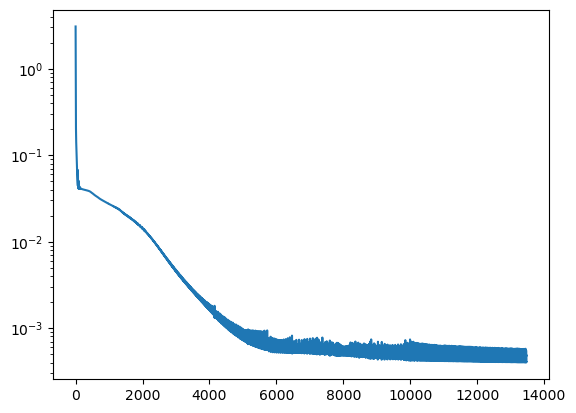

In [41]:
plt.plot(loss_history)
plt.yscale('log')

In [42]:
solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(MODEL),
        diffrax.Tsit5(),
        t0=float(time[0]),
        t1=float(time[-1]),
        dt0=0.01,
        y0=jnp.array([0, 10, 0], dtype=jnp.float64),  
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(time)),
    )
solutions.ys[:, 0]


/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_59915/2625204534.py:7: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  y0=jnp.array([0, 10, 0], dtype=jnp.float64),


Array([ 0.        ,  0.00654598,  0.01308255, ..., -0.00357466,
       -0.003583  , -0.00359133], dtype=float32)

In [43]:
min(loss_history)

Array(0.00040041, dtype=float32)

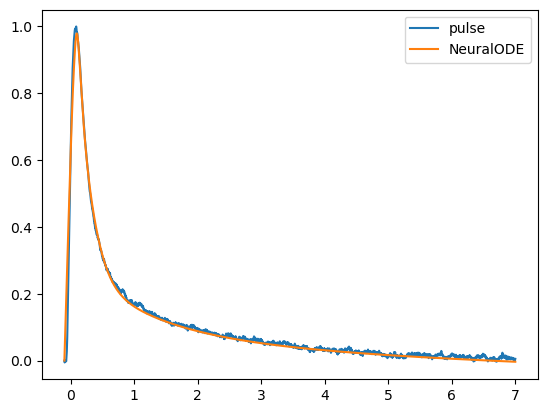

In [44]:
plt.plot(time, energies, label = "pulse")

plt.plot(time, solutions.ys[:, 0], label = "NeuralODE")
#plt.plot(time, energies-solutions.ys[:, 0])

plt.legend()


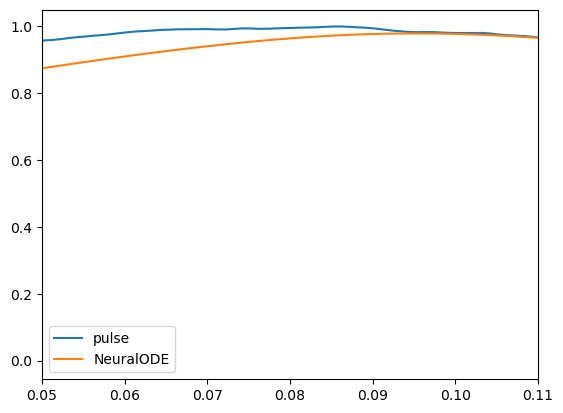

In [45]:
plt.plot(time, energies, label = "pulse")
plt.plot(time, solutions.ys[:, 0], label = "NeuralODE")
#plt.plot(time, energies-solutions.ys[:, 0])
plt.xlim(0.05, 0.11)
plt.legend()

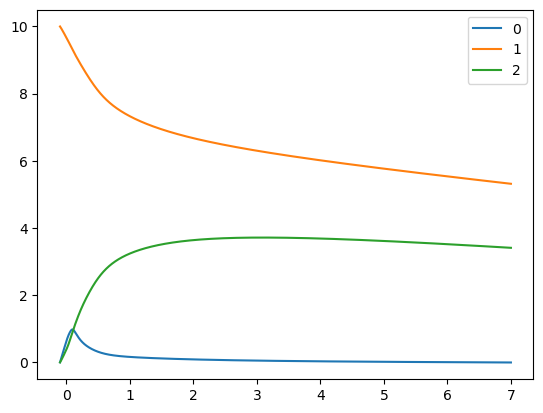

In [46]:
plt.plot(time, solutions.ys[:, 0], label = "0")
plt.plot(time, solutions.ys[:, 1], label = "1")
plt.plot(time, solutions.ys[:, 2], label = "2")


plt.legend()

(-0.1, 10.0)

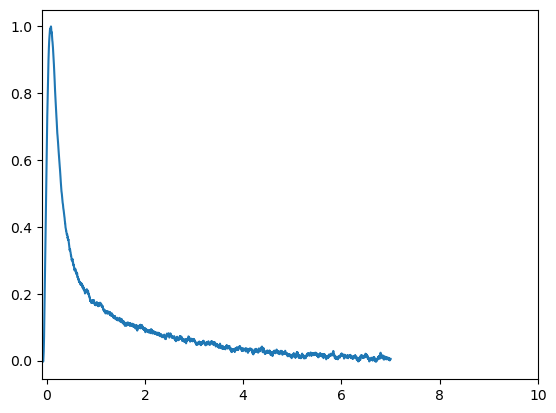

In [ ]:
plt.plot(time, energies)
plt.xlim(-0.1, 10)

In [ ]:
x = np.random.rand(4, 5)
x.shape

(4, 5)